In [1]:
%cd code

/opt/ml/code


In [2]:
from load_data import *
import pandas as pd

train_ori = load_data("../input/data/train/train.tsv")
print(train_ori)
boddin_add = pd.read_csv("../input/data/train/all+bodi.tsv", delimiter='\t')
print(boddin_add)
boddin_add=boddin_add.sample(frac=1).reset_index(drop=True)
print(boddin_add)

                                               sentence entity_01  \
0     영국에서 사용되는 스포츠 유틸리티 자동차의 브랜드로는 랜드로버(Land Rover)...      랜드로버   
1     선거에서 민주당은 해산 전 의석인 230석에 한참 못 미치는 57석(지역구 27석,...       민주당   
2     유럽 축구 연맹(UEFA) 집행위원회는 2014년 1월 24일에 열린 회의를 통해 ...  유럽 축구 연맹   
3     용병 공격수 챠디의 부진과 시즌 초 활약한 강수일의 침체, 시즌 중반에 영입한 세르...       강수일   
4     람캄행 왕은 1237년에서 1247년 사이 수코타이의 왕 퍼쿤 씨 인트라팃과 쓰엉 ...       람캄행   
...                                                 ...       ...   
8995  2002년 FIFA 월드컵 사우디아라비아와의 1차전에서 독일은 8-0으로 승리하였는...   사우디아라비아   
8996  일본의 2대 메이커인 토요타와 닛산은 시장 점유율을 높이기 위한 신차 개발을 계속하...       토요타   
8997  방호의의 손자 방덕룡(方德龍)은 1588년(선조 21년) 무과에 급제하고 낙안군수로...       방덕룡   
8998  LG전자는 올해 초 국내시장에 출시한 2020년형 ‘LG 그램’ 시리즈를 이달부터 ...      LG전자   
8999  전남도의회 안전건설소방위원회 차영수 의원(강진1)은 지난 14일 설 명절을 앞두고 ...       차영수   

           entity_02  label  
0                자동차     17  
1                27석      0  
2               UEFA      6  
3                공격수      2  
4          퍼쿤 씨 인트라팃 

In [3]:
print(train_ori.groupby('label').count())
print(boddin_add.groupby('label').count())

       sentence  entity_01  entity_02
label                                
0          4438       4438       4438
1            92         92         92
2           553        553        553
3            44         44         44
4           679        679        679
5           186        186        186
6           231        231        231
7           209        209        209
8           164        164        164
9           115        115        115
10          815        815        815
11           58         58         58
12           45         45         45
13           11         11         11
14           45         45         45
15          335        335        335
16           23         23         23
17          169        169        169
18            7          7          7
19            4          4          4
20          136        136        136
21           84         84         84
22           56         56         56
23           79         79         79
24          

<AxesSubplot:xlabel='label', ylabel='Count'>

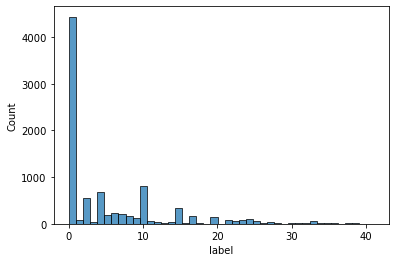

In [4]:
import seaborn as sns

sns.histplot(train_ori['label'])

<AxesSubplot:xlabel='label', ylabel='Count'>

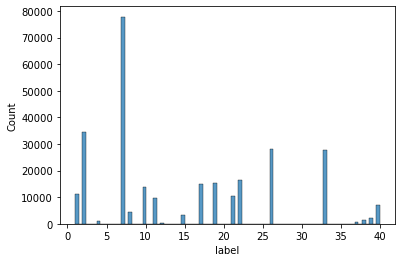

In [5]:
sns.histplot(boddin_add['label'])

       sentence  entity_01  entity_02     ratio
label                                          
0          4438       4438       4438  0.493111
1            92         92         92  0.010222
2           553        553        553  0.061444
3            44         44         44  0.004889
4           679        679        679  0.075444
5           186        186        186  0.020667
6           231        231        231  0.025667
7           209        209        209  0.023222
8           164        164        164  0.018222
9           115        115        115  0.012778
10          815        815        815  0.090556
11           58         58         58  0.006444
12           45         45         45  0.005000
13           11         11         11  0.001222
14           45         45         45  0.005000
15          335        335        335  0.037222
16           23         23         23  0.002556
17          169        169        169  0.018778
18            7          7          7  0

<AxesSubplot:xlabel='label', ylabel='Count'>

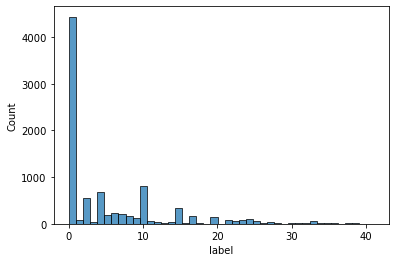

In [6]:
train_ratio = train_ori.groupby('label').count()
train_ratio['ratio'] = train_ratio['sentence'] / len(train_ori)
print(train_ratio)
sns.histplot(train_ori['label'])

In [7]:
import copy

boddin_add_cut = copy.deepcopy(boddin_add)

In [8]:
def show_hist(boddin_add_cut):
    ratio = boddin_add_cut.groupby('label').count()
    ratio['ratio'] = ratio['sentence'] / len(boddin_add_cut)
    print(ratio)
    sns.histplot(boddin_add_cut['label'])

In [22]:
add_list = []

       sentence  entity_01  entity_02     ratio
label                                          
1         11159      11159      11159  0.040367
2         34338      34338      34338  0.124215
4           535        535        535  0.001935
7         77850      77850      77850  0.281616
8          4158       4158       4158  0.015041
10        13779      13779      13779  0.049844
11         9650       9650       9650  0.034908
12          124        124        124  0.000449
15         3436       3436       3436  0.012429
17        15039      15039      15039  0.054402
19        15402      15402      15402  0.055716
21        10461      10461      10461  0.037842
22        16601      16601      16601  0.060053
26        25037      25037      25037  0.090569
33        27757      27757      27757  0.100409
37          551        551        551  0.001993
38         1591       1591       1591  0.005755
39         2062       2062       2062  0.007459
40         6910       6910       6910  0

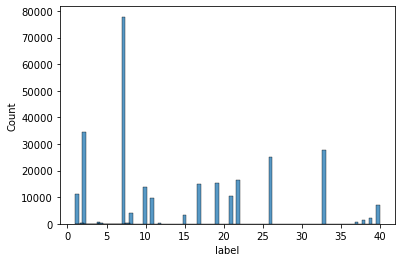

In [34]:
count = 93
target = [5]
delete_list = []
for index, (sentence, entity_01, entity_02, label) in boddin_add_cut.iterrows():
    if label in target:
        add_list.append(boddin_add_cut.loc[index])
        delete_list.append(index)
        count -= 1
    if count == 0:
        boddin_add_cut = boddin_add_cut.drop(delete_list)
        break
show_hist(boddin_add_cut)
show_hist(pd.DataFrame(add_list))

       sentence  entity_01  entity_02     ratio
label                                          
1            46         46         46  0.042951
2           277        277        277  0.258637
4           340        340        340  0.317460
8           408        408        408  0.380952


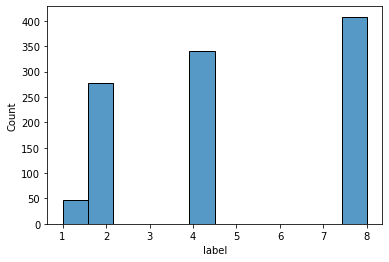

In [35]:
show_hist(pd.DataFrame(add_list))

[sentence     아버지 허엽 이 첫 부 인 청주한 씨 ( 淸州韓氏 ) 에게서 허성 ( 許筬 ) 과 ...
entity_01                                                   허균
entity_02                                                   허엽
label                                                        8
Name: 3, dtype: object, sentence     * 2012 년 《 다이라노 기요모리 》 - 다이라노 다다모리 역 
entity_01                                다이라노 기요모리
entity_02                                다이라노 다다모리
label                                            8
Name: 12, dtype: object, sentence     후일 1976 년 그 의 장남 손원일 은 손정도 의 개종 과정 에 대해 이렇 게 회...
entity_01                                                  손원일
entity_02                                                  손정도
label                                                        8
Name: 33, dtype: object, sentence     호로관 전투 에서 하내 태수 왕광 ( 王匡 ) 이 동탁 의 양아들 여포 ( 呂布 )...
entity_01                                                   여포
entity_02                                                   동탁
label                       

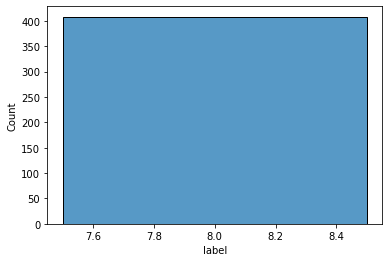

In [21]:
print(add_list[0:5])
pd.DataFrame(add_list[0:5])
show_hist(pd.DataFrame(add_list))

In [22]:
count = 4000
target = 0
delete_list = []
for index, (sentence, entity_01, entity_02, label) in train_ori.iterrows():
    if label == target:
        delete_list.append(index)
        count -= 1
    if count == 0:
        train_ori = train_ori.drop(delete_list)
        break

<AxesSubplot:xlabel='label', ylabel='Count'>

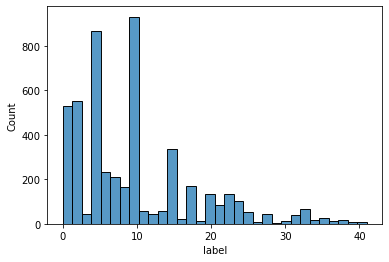

In [23]:
train_ori_temp = copy.deepcopy(train_ori)
train_ratio_temp = train_ori_temp.groupby('label').count()
train_ratio_temp['ratio'] = train_ratio_temp['sentence'] / len(train_ori_temp)
sns.histplot(train_ori_temp['label'])

In [24]:
print(train_ratio)

       sentence  entity_01  entity_02   ratio
label                                        
0           438        438        438  0.0876
1            92         92         92  0.0184
2           553        553        553  0.1106
3            44         44         44  0.0088
4           679        679        679  0.1358
5           186        186        186  0.0372
6           231        231        231  0.0462
7           209        209        209  0.0418
8           164        164        164  0.0328
9           115        115        115  0.0230
10          815        815        815  0.1630
11           58         58         58  0.0116
12           45         45         45  0.0090
13           11         11         11  0.0022
14           45         45         45  0.0090
15          335        335        335  0.0670
16           23         23         23  0.0046
17          169        169        169  0.0338
18            7          7          7  0.0014
19            4          4        

       sentence  entity_01  entity_02     ratio
label                                          
0          4438       4438       4438  0.034561
1         11297      11297      11297  0.087975
2         19168      19168      19168  0.149271
3            44         44         44  0.000343
4          1554       1554       1554  0.012102
5           186        186        186  0.001448
6           231        231        231  0.001799
7         18059      18059      18059  0.140634
8          4730       4730       4730  0.036835
9           115        115        115  0.000896
10        14594      14594      14594  0.113651
11         9708       9708       9708  0.075601
12          169        169        169  0.001316
13           11         11         11  0.000086
14           45         45         45  0.000350
15         3771       3771       3771  0.029367
16           23         23         23  0.000179
17        10208      10208      10208  0.079495
18            7          7          7  0

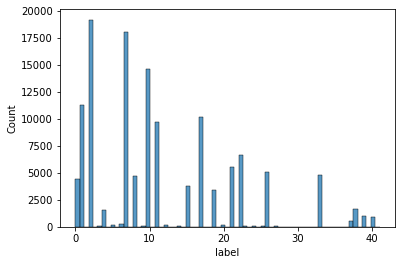

In [37]:
train_boddin_add_cut = pd.concat([train_ori,boddin_add_cut])
show_hist(train_boddin_add_cut)

In [38]:
# train_boddin_add_cut=train_boddin_add_cut.sample(frac=1).reset_index(drop=True)

train_boddin_add_cut.to_csv('../input/data/train/train+all+bodi_1.tsv', index=False, sep='\t')

       sentence  entity_01  entity_02     ratio
label                                          
1         11205      11205      11205  0.093836
2         18615      18615      18615  0.155890
4           875        875        875  0.007328
7         17850      17850      17850  0.149484
8          4566       4566       4566  0.038238
10        13779      13779      13779  0.115391
11         9650       9650       9650  0.080813
12          124        124        124  0.001038
15         3436       3436       3436  0.028775
17        10039      10039      10039  0.084071
19         3402       3402       3402  0.028490
21         5461       5461       5461  0.045733
22         6601       6601       6601  0.055280
26         5037       5037       5037  0.042182
33         4757       4757       4757  0.039837
37          551        551        551  0.004614
38         1591       1591       1591  0.013324
39          962        962        962  0.008056
40          910        910        910  0

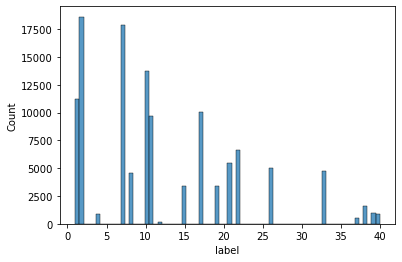

In [36]:
show_hist(boddin_add_cut)